# Demo 0

Comparision of images when only the first few DCTs are retained.

In [1]:
import numpy as np

from PIL import Image

from scipy.fft import dctn, idctn
from matplotlib import pyplot as plt
from matplotlib import pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (12, 12)

Text(0.5, 1.0, 'Original image in graymap')

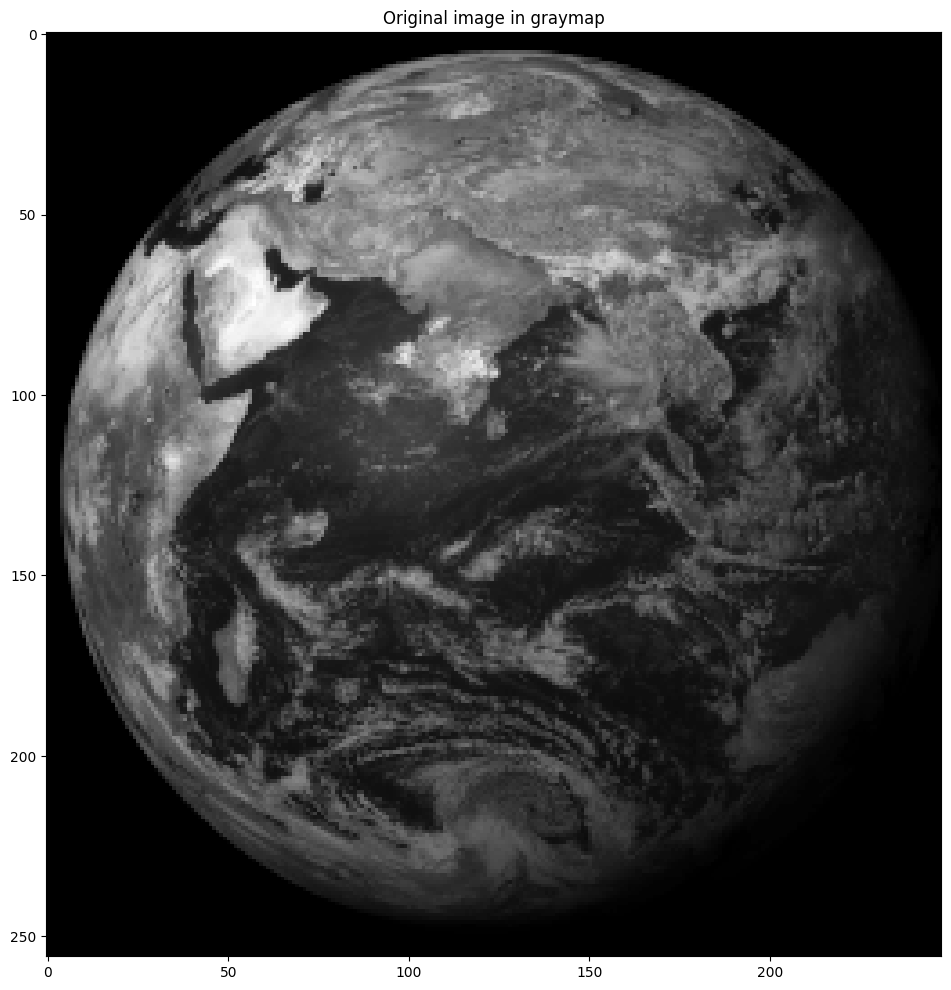

In [2]:
y, cb, cr = Image.open('images/earth-256.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

In [3]:
quant_table = [
  16,  11,  10,  16,  24,  40,  51,  61,
  12,  12,  14,  19,  26,  58,  60,  55,
  14,  13,  16,  24,  40,  57,  69,  56,
  14,  17,  22,  29,  51,  87,  80,  62,
  18,  22,  37,  56,  68, 109, 103,  77,
  24,  35,  55,  64,  81, 104, 113,  92,
  49,  64,  78,  87, 103, 121, 120, 101,
  72,  92,  95,  98, 112, 100, 103,  99,
]

In [4]:
dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        dim = dctn(im[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

        dct[i:(i+8), j:(j+8)] = (np.rint(dim.ravel() / quant_table) * quant_table).reshape((8, 8))

Text(0.5, 1.0, '8x8 DCTs of the image')

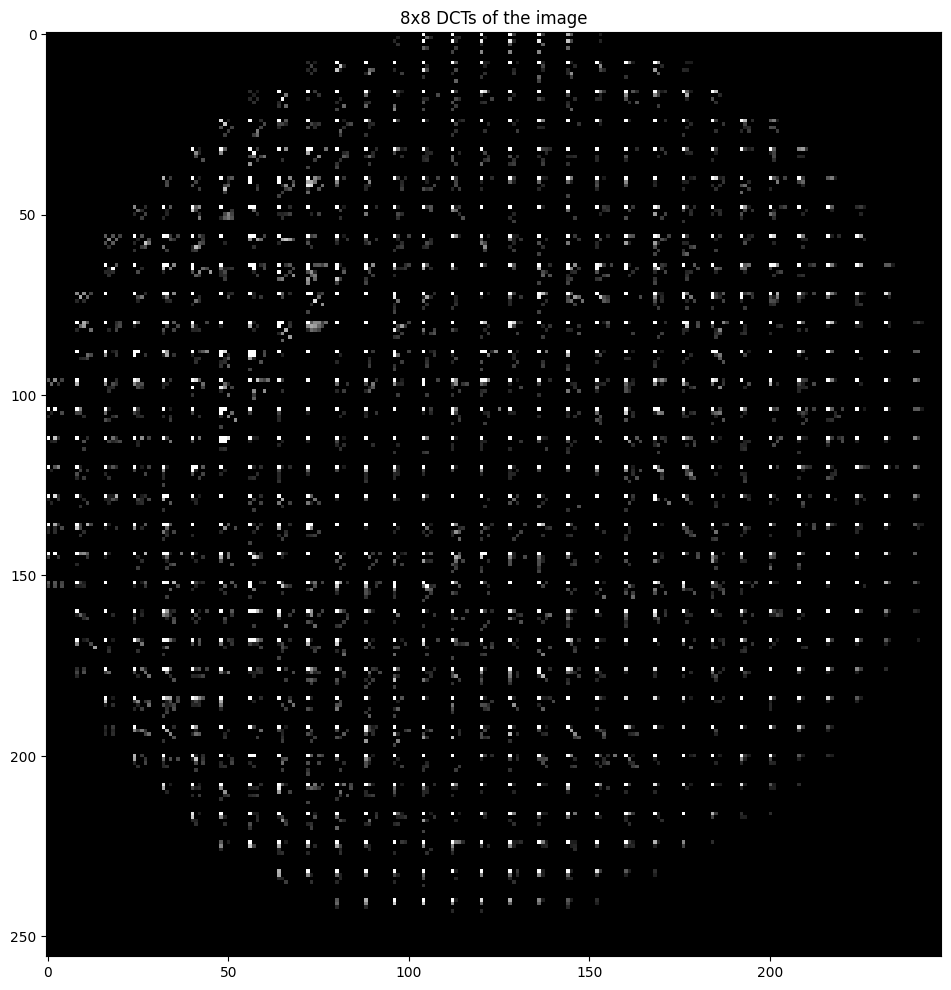

In [5]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.08, vmin=0)
plt.title("8x8 DCTs of the image")

In [6]:
image_dct = np.zeros(im.shape)

# Do 8x8 DCT on image (in-place)
for i in np.r_[:im.shape[0]:8]:
    for j in np.r_[:im.shape[1]:8]:
        image_dct[i:(i+8),j:(j+8)] = idctn(dct[i:(i+8), j:(j+8)], axes=[0, 1], norm='ortho')

Text(0.5, 1.0, 'Image reconstructed from DCTs')

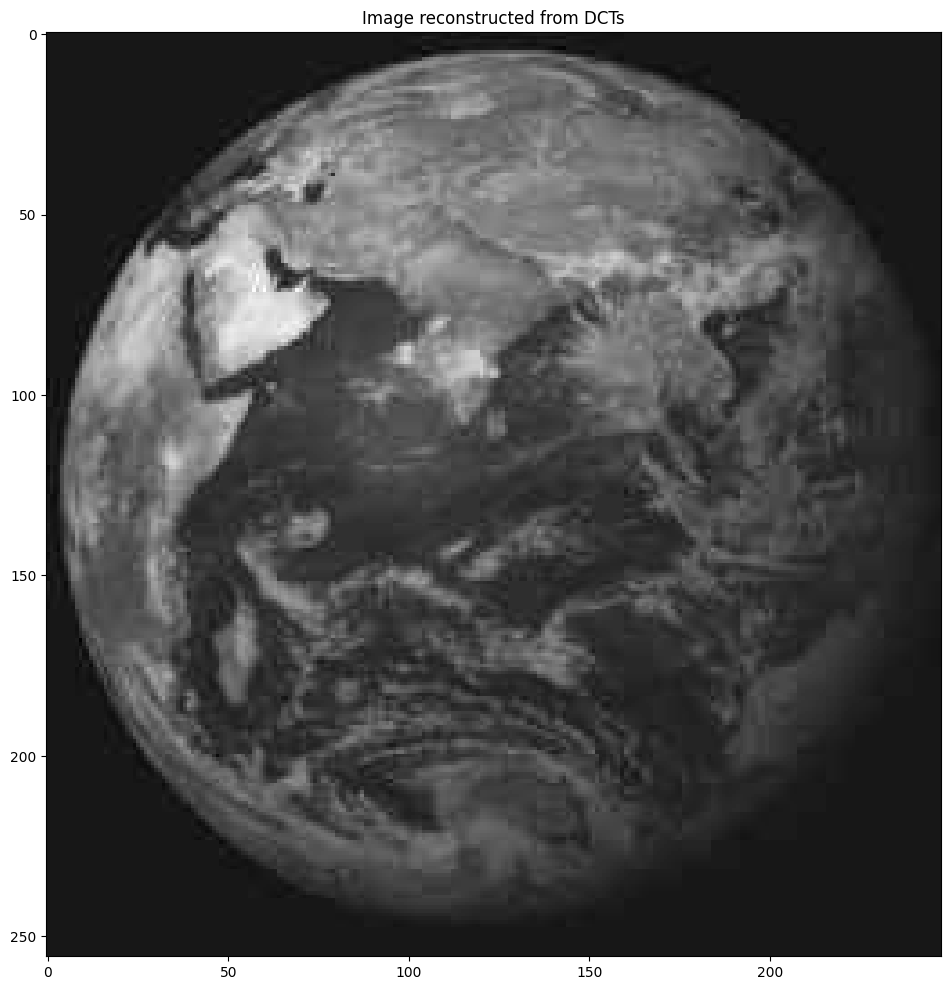

In [7]:
plt.figure()
plt.imshow(image_dct, cmap='gray')
plt.title("Image reconstructed from DCTs")

Text(0.5, 1.0, 'Comparison: Image and Image_DCT')

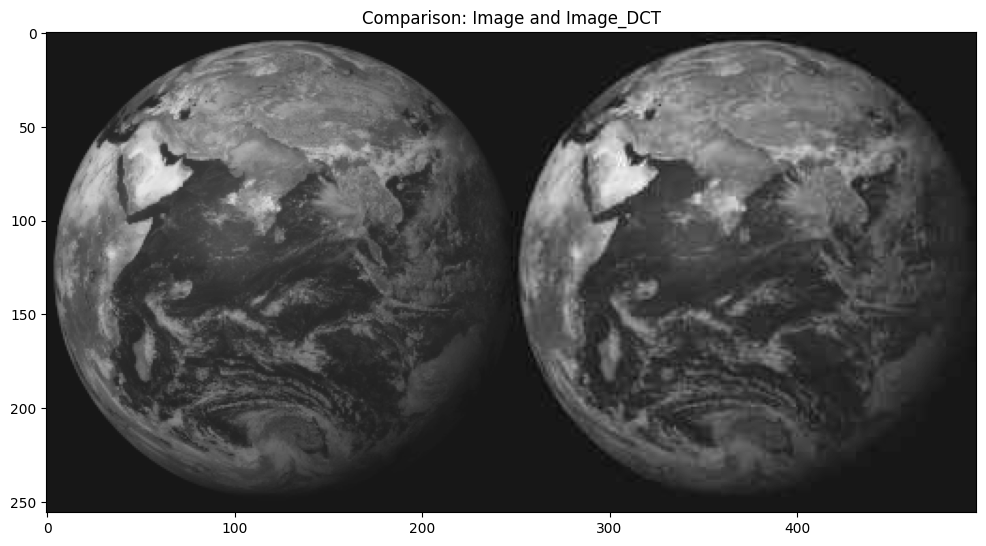

In [8]:
plt.figure()
plt.imshow( np.hstack( (im, image_dct) ), cmap='gray')
plt.title("Comparison: Image and Image_DCT" )

In [ ]:
plt.imsave('dct_orig_comparision.png', np.hstack( (im, image_dct) ), cmap='gray')